<a href="https://colab.research.google.com/github/youssef-snoussi/DL-notebook/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

In [3]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteOZP84T/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteOZP84T/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteOZP84T/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
encoder = info.features['text'].encoder
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [5]:
sample_string = 'Hi TensorFlow.'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [1052, 7961, 6307, 2327, 4043, 2120, 7975]
The original string: "Hi TensorFlow."


In [6]:
assert original_string == sample_string

In [7]:

for index in encoded_string:
  print('{} ----> {}'.format(index, encoder.decode([index])))

1052 ----> Hi
7961 ---->  
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


In [8]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [9]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)

test_dataset = test_dataset.padded_batch(BATCH_SIZE)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [11]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [12]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 46s 118ms/step - loss: 0.6570 - accuracy: 0.5541 - val_loss: 0.4712 - val_accuracy: 0.7479
Epoch 2/10
391/391 [==============================] - 46s 117ms/step - loss: 0.3374 - accuracy: 0.8580 - val_loss: 0.3407 - val_accuracy: 0.8635
Epoch 3/10
391/391 [==============================] - 45s 116ms/step - loss: 0.2505 - accuracy: 0.9041 - val_loss: 0.3278 - val_accuracy: 0.8479
Epoch 4/10
391/391 [==============================] - 45s 114ms/step - loss: 0.2093 - accuracy: 0.9223 - val_loss: 0.3203 - val_accuracy: 0.8708
Epoch 5/10
391/391 [==============================] - 46s 117ms/step - loss: 0.1864 - accuracy: 0.9313 - val_loss: 0.3390 - val_accuracy: 0.8651
Epoch 6/10
391/391 [==============================] - 46s 116ms/step - loss: 0.1613 - accuracy: 0.9442 - val_loss: 0.3600 - val_accuracy: 0.8661
Epoch 7/10
391/391 [==============================] - 45s 116ms/step - loss: 0.1457 - accuracy: 0.9484 - val_loss: 0.3791 - val_ac

In [13]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 20s 52ms/step - loss: 0.4554 - accuracy: 0.8567
Test Loss: 0.4554426074028015
Test Accuracy: 0.856719970703125


In [26]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [15]:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

In [16]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[-0.29647127]]


In [17]:
# predict on a sample text with padding

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

[[-0.12697552]]


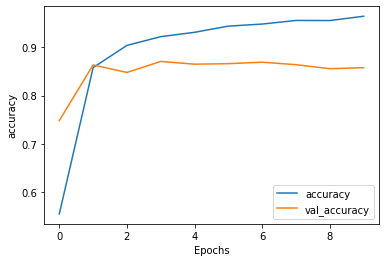

In [18]:
plot_graphs(history, 'accuracy')

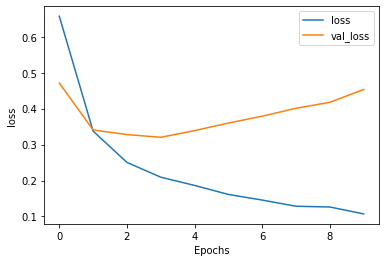

In [19]:
plot_graphs(history, 'loss')

more lstm layers

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [21]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [22]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 79s 202ms/step - loss: 0.6504 - accuracy: 0.5598 - val_loss: 0.4977 - val_accuracy: 0.7786
Epoch 2/10
391/391 [==============================] - 78s 200ms/step - loss: 0.3949 - accuracy: 0.8349 - val_loss: 0.3695 - val_accuracy: 0.8396
Epoch 3/10
391/391 [==============================] - 78s 200ms/step - loss: 0.2849 - accuracy: 0.8928 - val_loss: 0.3891 - val_accuracy: 0.8557
Epoch 4/10
391/391 [==============================] - 79s 202ms/step - loss: 0.2305 - accuracy: 0.9180 - val_loss: 0.3511 - val_accuracy: 0.8589
Epoch 5/10
391/391 [==============================] - 79s 201ms/step - loss: 0.1903 - accuracy: 0.9372 - val_loss: 0.3614 - val_accuracy: 0.8620
Epoch 6/10
391/391 [==============================] - 79s 202ms/step - loss: 0.1627 - accuracy: 0.9510 - val_loss: 0.4119 - val_accuracy: 0.8495
Epoch 7/10
391/391 [==============================] - 78s 200ms/step - loss: 0.1479 - accuracy: 0.9546 - val_loss: 0.4638 - val_ac

In [23]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 37s 95ms/step - loss: 0.5249 - accuracy: 0.8443
Test Loss: 0.5248586535453796
Test Accuracy: 0.8443199992179871


In [24]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[-2.616097]]


In [25]:
# predict on a sample text with padding

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

[[-2.0734735]]


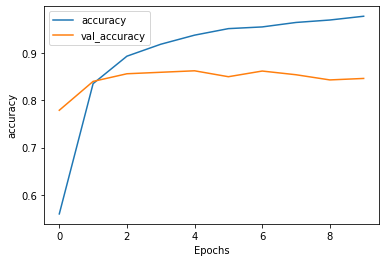

In [27]:
plot_graphs(history, 'accuracy')

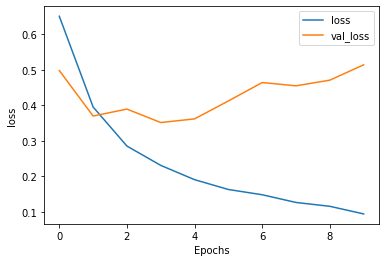

In [28]:
plot_graphs(history, 'loss')
